In [1]:
from glob import glob
from os.path import join
from tensorflow.keras import layers, models
import xarray as xr
import pandas as pd
import numpy as np
from keras import backend as K
import gc
import matplotlib.pyplot as plt
import imports.GDL_layers as GDL_layers

2022-08-08 13:03:56.608891: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Find a list of all the datafiles
patch_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/"
patch_files = sorted(glob(join(patch_path, "*.nc")))
patch_ds = xr.open_dataset(patch_files[0])
csv_path = "/glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/"
csv_files = sorted(glob(join(csv_path, "track_step_*.csv")))
meta_ds = pd.read_csv(csv_files[0])

In [3]:
patch_ds

<xarray.Dataset>
Dimensions:           (p: 370, row: 144, col: 144)
Coordinates:
  * p                 (p) int32 0 1 2 3 4 5 6 7 ... 363 364 365 366 367 368 369
  * row               (row) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
  * col               (col) int32 0 1 2 3 4 5 6 ... 137 138 139 140 141 142 143
Data variables: (12/26)
    lon               (p, row, col) float32 ...
    lat               (p, row, col) float32 ...
    i                 (p, row, col) int32 ...
    j                 (p, row, col) int32 ...
    x                 (p, row, col) float32 ...
    y                 (p, row, col) float32 ...
    ...                ...
    MLCAPE_prev       (p, row, col) float32 ...
    USHR6_prev        (p, row, col) float32 ...
    VSHR6_prev        (p, row, col) float32 ...
    SBLCL_prev        (p, row, col) float32 ...
    U_BUNK_prev       (p, row, col) float32 ...
    V_BUNK_prev       (p, row, col) float32 ...
Attributes: (12/36)
    Conventions:             CF-1.6
    title:                   NCARSTORM Storm Patches for run 20101024-0000 me...
    object_variable:         REFL_COM
    start_hour:              12
    end_hour:                35
    HRRR_alt_end_hour:       46
    ...                      ...
    single_step:             True
    label_type:              gamma
    model_map_file:          /glade/work/cbecker/hagelslag/mapfiles/ncar_stor...
    mask_file:               None
    run_date_format:         %Y%m%d-%H%M
    json:                    False

In [4]:
meta_ds

,Step_ID,Track_ID,Ensemble_Name,Ensemble_Member,Run_Date,Valid_Date,Forecast_Hour,Valid_Hour_UTC,Duration,Centroid_Lon,...,eccentricity,major_axis_length,minor_axis_length,orientation,Matched,Max_Hail_Size,Num_Matches,Shape,Location,Scale
0,d01_REFL_COM_20101024-0000_12_13_000_00,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-98.41019,...,0.90735,51.23550,21.53869,1.41172,0,0,0,0,0,0
1,d01_REFL_COM_20101024-0000_12_13_000_01,d01_REFL_COM_20101024-0000_12_13_000,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-97.69198,...,0.85356,26.92719,14.02906,1.13923,0,0,0,0,0,0
2,d01_REFL_COM_20101024-0000_12_12_001_00,d01_REFL_COM_20101024-0000_12_12_001,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-95.15486,...,0.71815,8.65894,6.02569,0.74301,0,0,0,0,0,0
3,d01_REFL_COM_20101024-0000_12_13_002_00,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 12:00:00+00:00,12,12,1,-94.39792,...,0.58687,7.89825,6.39509,-1.28875,0,0,0,0,0,0
4,d01_REFL_COM_20101024-0000_12_13_002_01,d01_REFL_COM_20101024-0000_12_13_002,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-24 13:00:00+00:00,13,13,2,-94.21008,...,0.91899,27.65443,10.90375,0.32912,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,d01_REFL_COM_20101024-0000_35_35_238_00,d01_REFL_COM_20101024-0000_35_35_238,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.94177,...,0.44428,6.31100,5.65396,1.29480,0,0,0,0,0,0
366,d01_REFL_COM_20101024-0000_35_35_239_00,d01_REFL_COM_20101024-0000_35_35_239,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-85.16997,...,0.85947,79.05277,40.41106,0.12811,0,0,0,0,0,0
367,d01_REFL_COM_20101024-0000_35_35_240_00,d01_REFL_COM_20101024-0000_35_35_240,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-88.18374,...,0.92145,18.05184,7.01316,0.99009,0,0,0,0,0,0
368,d01_REFL_COM_20101024-0000_35_35_241_00,d01_REFL_COM_20101024-0000_35_35_241,NCARSTORM,d01,2010-10-24 00:00:00+00:00,2010-10-25 11:00:00+00:00,35,11,1,-82.50549,...,0.93744,14.44305,5.02817,-0.19595,0,0,0,0,0,0


In [5]:
# Pull selected variables from patch files and join into a single DataSet
num_files = 150
variables = ["i", "j", "REFL_COM_curr"]
data_list = []
for p, patch_file in enumerate(patch_files[0:num_files]):
    if p % 10 == 0:
        print(p, patch_file)
    ds = xr.open_dataset(patch_file)
    data_list.append(ds[variables].compute())
    ds.close()
data = xr.concat(data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20101024-0000_d01_model_patches.nc
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110201-0000_d01_model_patches.nc
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110326-0000_d01_model_patches.nc
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110414-0000_d01_model_patches.nc
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110425-0000_d01_model_patches.nc
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110522-0000_d01_model_patches.nc
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110605-0000_d01_model_patches.nc
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110615-0000_d01_model_patches.nc
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_nc_refl/NCARSTORM_20110625-0000_d01_model_patches.nc
90 /glade/scratch/lverhoef/WR

In [6]:
# Pull variables from csv files and join into an array
csv_variables = ["major_axis_length", "minor_axis_length"]
csv_data_list = []
for p, csv_file in enumerate(csv_files[0:num_files]):
    if p % 10 == 0:
        print(p, csv_file)
    csv_ds = pd.read_csv(csv_file)
    csv_data_list.append(csv_ds[csv_variables].to_xarray().rename({'index': 'p'}))
csv_data = xr.concat(csv_data_list, dim="p")

0 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20101024-0000.csv
10 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110201-0000.csv
20 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110326-0000.csv
30 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110414-0000.csv
40 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110425-0000.csv
50 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110522-0000.csv
60 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110605-0000.csv
70 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110615-0000.csv
80 /glade/scratch/lverhoef/WRF_all/track_data_hrrr_3km_csv_refl/track_step_NCARSTORM_d01_20110625-0000.csv
90 /glade/scratch/lverhoef/WRF_all/tra

In [7]:
# Create DataArrays for input and output data
input_data = data["REFL_COM_curr"].expand_dims("channel", axis=-1)
output_data = csv_data.to_array().transpose()
del data
del csv_data

In [8]:
# Display shapes
print(input_data.shape)
print(output_data.shape)

(51346, 144, 144, 1)
(51346, 2)


In [9]:
# Find indices to split data into 70% training, 10% validation, and 20% test. The training and validation data are shuffled, while the test data is temporally different.
rng = np.random.default_rng()
split_point_1 = int(0.7 * input_data.shape[0])
split_point_2 = int(0.8 * input_data.shape[0])
train_val_indices = np.arange(0, split_point_2)
rng.shuffle(train_val_indices)
train_indices = train_val_indices[:split_point_1]
val_indices = train_val_indices[split_point_1:]
test_indices = np.arange(split_point_2, input_data.shape[0])

In [10]:
# Normalize the training input data and actually evaluate the input_train array which will be fed into the network
input_train = input_data.values[train_indices]
scale_stats = pd.DataFrame(index=[0], columns=["mean", "sd"])
scale_stats.loc[0, "mean"] = input_train.mean()
scale_stats.loc[0, "sd"] = input_train.std()
input_train_norm = (input_train - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [11]:
# Normalize the validation data
input_val = input_data.values[val_indices]
input_val_norm = (input_val - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [12]:
# Normalize the test input data and generate the test dataset
input_test = input_data.values[test_indices]
input_test_norm = (input_test - scale_stats.loc[0, "mean"]) / scale_stats.loc[0, "sd"]

In [13]:
# Split output into train, test, and validation sets
output_train = output_data[train_indices]
output_val = output_data[val_indices]
output_test = output_data[test_indices]

In [14]:
# Normalize the output data
output_scale_stats = pd.DataFrame(index=range(output_train.shape[-1]), columns=["mean", "sd"])
output_scale_stats.loc[:, "mean"] = output_train.mean(dim="p")
output_scale_stats.loc[:, "sd"] = output_train.std(dim="p")
output_train_norm = xr.DataArray(coords=output_train.coords, dims=output_train.dims)
output_val_norm = xr.DataArray(coords=output_val.coords, dims=output_val.dims)
output_test_norm = xr.DataArray(coords=output_test.coords, dims=output_test.dims)
for i in range(output_train.shape[-1]):
    output_train_norm[:, i] = (output_train[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_val_norm[:, i] = (output_val[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]
    output_test_norm[:, i] = (output_test[:, i] - output_scale_stats.loc[i, "mean"]) / output_scale_stats.loc[i, "sd"]

In [15]:
gdl_history = []
cnn_history = []
for frac in range(6):
    prop = 1 / (2**frac)
    print(f"Training with 1/{2**frac} of the data:")
    rest_point = int(input_train_norm.shape[0] * prop)

    gdl_model = models.Sequential()
    gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3), rot_axis=False, input_shape=(144, 144, 1)))
    gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
    gdl_model.add(GDL_layers.RotEquivConv2D(32, (3, 3)))
    gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
    gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
    gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
    gdl_model.add(GDL_layers.RotEquivConv2D(64, (3, 3)))
    gdl_model.add(GDL_layers.RotEquivPool2D((2, 2)))
    gdl_model.add(GDL_layers.RotEquivConv2D(128, (3, 3)))
    gdl_model.add(GDL_layers.RotInvPool())
    gdl_model.add(layers.Flatten())
    gdl_model.add(layers.Dense(2))

    gdl_model.compile(
        optimizer='nadam',
        loss='mse',
    )

    print("Training GDL model")
    gdl_history.append(
        gdl_model.fit(
            x=input_train_norm[:rest_point],
            y=output_train_norm[:rest_point],
            epochs=20,
            validation_data=(input_val_norm, output_val_norm)
        )
    )

    K.clear_session()
    del gdl_model
    gc.collect()

    cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(2))

    cnn_model.compile(
        optimizer='nadam',
        loss='mse',
    )

    print("Training CNN model")
    cnn_history.append(
        cnn_model.fit(
            x=input_train_norm[:rest_point],
            y=output_train_norm[:rest_point],
            epochs=20,
            validation_data=(input_val_norm, output_val_norm)
        )
    )
    K.clear_session()
    del cnn_model
    gc.collect()

Training with 1/1 of the data:


2022-08-08 13:05:44.472374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-08 13:05:47.952657: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30988 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:89:00.0, compute capability: 7.0


Training GDL model
Epoch 1/20


2022-08-08 13:06:00.006756: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


1124/1124 [==============================] - 101s 74ms/step - loss: 0.2969 - val_loss: 0.1270
Epoch 2/20
1124/1124 [==============================] - 81s 72ms/step - loss: 0.1260 - val_loss: 0.1063
Epoch 3/20
1124/1124 [==============================] - 80s 71ms/step - loss: 0.0929 - val_loss: 0.0739
Epoch 4/20
1124/1124 [==============================] - 80s 71ms/step - loss: 0.0709 - val_loss: 0.1249
Epoch 5/20
1124/1124 [==============================] - 80s 71ms/step - loss: 0.0618 - val_loss: 0.0692
Epoch 6/20
1124/1124 [==============================] - 81s 72ms/step - loss: 0.0503 - val_loss: 0.1744
Epoch 7/20
1124/1124 [==============================] - 81s 72ms/step - loss: 0.0469 - val_loss: 0.0978
Epoch 8/20
1124/1124 [==============================] - 80s 71ms/step - loss: 0.0406 - val_loss: 0.0648
Epoch 9/20
1124/1124 [==============================] - 80s 71ms/step - loss: 0.0371 - val_loss: 0.0750
Epoch 10/20
1124/1124 [==============================] - 80s 71ms/step - l

(0.0, 0.75)

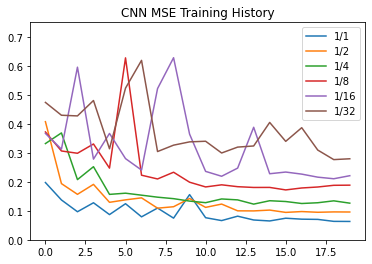

In [26]:
for i in range(6):
    plt.plot(cnn_history[i].history['val_loss'], label=f'1/{2**i}')
plt.legend()
plt.title("CNN MSE Training History")
ax = plt.gca()
ax.set_ylim(bottom=0, top=0.75)

(0.0, 0.75)

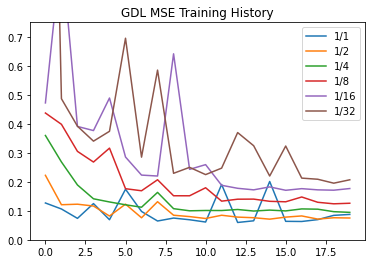

In [27]:
for i in range(6):
    plt.plot(gdl_history[i].history['val_loss'], label=f'1/{2**i}')
plt.legend()
plt.title("GDL MSE Training History")
ax = plt.gca()
ax.set_ylim(bottom=0, top=0.75)

(0.0, 0.4248368635773659)

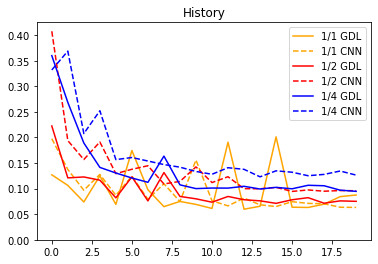

In [23]:
colors = ['orange', 'red', 'blue', 'green', 'gold', 'purple']
for i in range(3):
    plt.plot(gdl_history[i].history['val_loss'], label=f'1/{2**i} GDL', color=colors[i])
    plt.plot(cnn_history[i].history['val_loss'], label=f'1/{2**i} CNN', color=colors[i], linestyle='dashed')
plt.legend()
plt.title("History")
ax = plt.gca()
ax.set_ylim(bottom=0)

(0.0, 0.75)

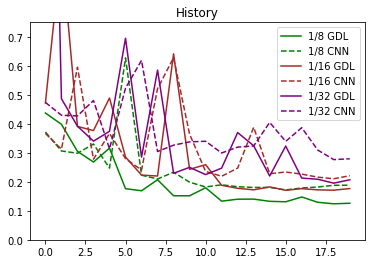

In [28]:
colors = ['orange', 'red', 'blue', 'green', 'brown', 'purple']
for i in range(3, 6):
    plt.plot(gdl_history[i].history['val_loss'], label=f'1/{2**i} GDL', color=colors[i])
    plt.plot(cnn_history[i].history['val_loss'], label=f'1/{2**i} CNN', color=colors[i], linestyle='dashed')
plt.legend()
plt.title("History")
ax = plt.gca()
ax.set_ylim(bottom=0, top=0.75)